<a href="https://colab.research.google.com/github/tetyanaCY/MATH_GoIT/blob/main/HW34_T_Andreades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd

# Оновлення таблиці з роботами та їх тривалістю згідно з новими даними
tasks_data = {
    "Назва": ["0-2", "0-1", "1-3", "3-5", "1-4", "2-6", "4-7", "4-8", "7-9", "8-10", "9-11", "11-12", "12-13"],
    "Опис роботи": [
        "Проектування бази даних", "Підготовка дизайну", "Верстка дизайну",
        "Підготовка текстів для сайту", "Програмування динамічних елементів інтерфейсу",
        "Програмування ендпоінтів", "Поєднання фронта і беку", "Підготовка документів",
        "Користувацьке тестування сайту", "Розміщення документів на сайті",
        "Проходження валідації платіжної системи", "Підключення платіжної системи",
        "Додавання спеціальної анімації"
    ],
    "Оцінка тривалості": [4, 3, 1, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3]
}

# Створення оновленої таблиці
tasks_df = pd.DataFrame(tasks_data)
tasks_df



,Назва,Опис роботи,Оцінка тривалості
0,0-2,Проектування бази даних,4
1,0-1,Підготовка дизайну,3
2,1-3,Верстка дизайну,1
3,3-5,Підготовка текстів для сайту,3
4,1-4,Програмування динамічних елементів інтерфейсу,3
5,2-6,Програмування ендпоінтів,3
6,4-7,Поєднання фронта і беку,2
7,4-8,Підготовка документів,2
8,7-9,Користувацьке тестування сайту,3
9,8-10,Розміщення документів на сайті,1


Таблиця завдань для проекту:
    Назва                                    Опис роботи  Оцінка тривалості
0     0-2                        Проектування бази даних                  4
1     0-1                             Підготовка дизайну                  3
2     1-3                                Верстка дизайну                  1
3     3-5                   Підготовка текстів для сайту                  3
4     1-4  Програмування динамічних елементів інтерфейсу                  3
5     2-6                       Програмування ендпоінтів                  3
6     4-7                        Поєднання фронта і беку                  2
7     4-8                          Підготовка документів                  2
8     7-9                 Користувацьке тестування сайту                  3
9    8-10                 Розміщення документів на сайті                  1
10   9-11        Проходження валідації платіжної системи                  3
11  11-12                  Підключення платіжної системи   

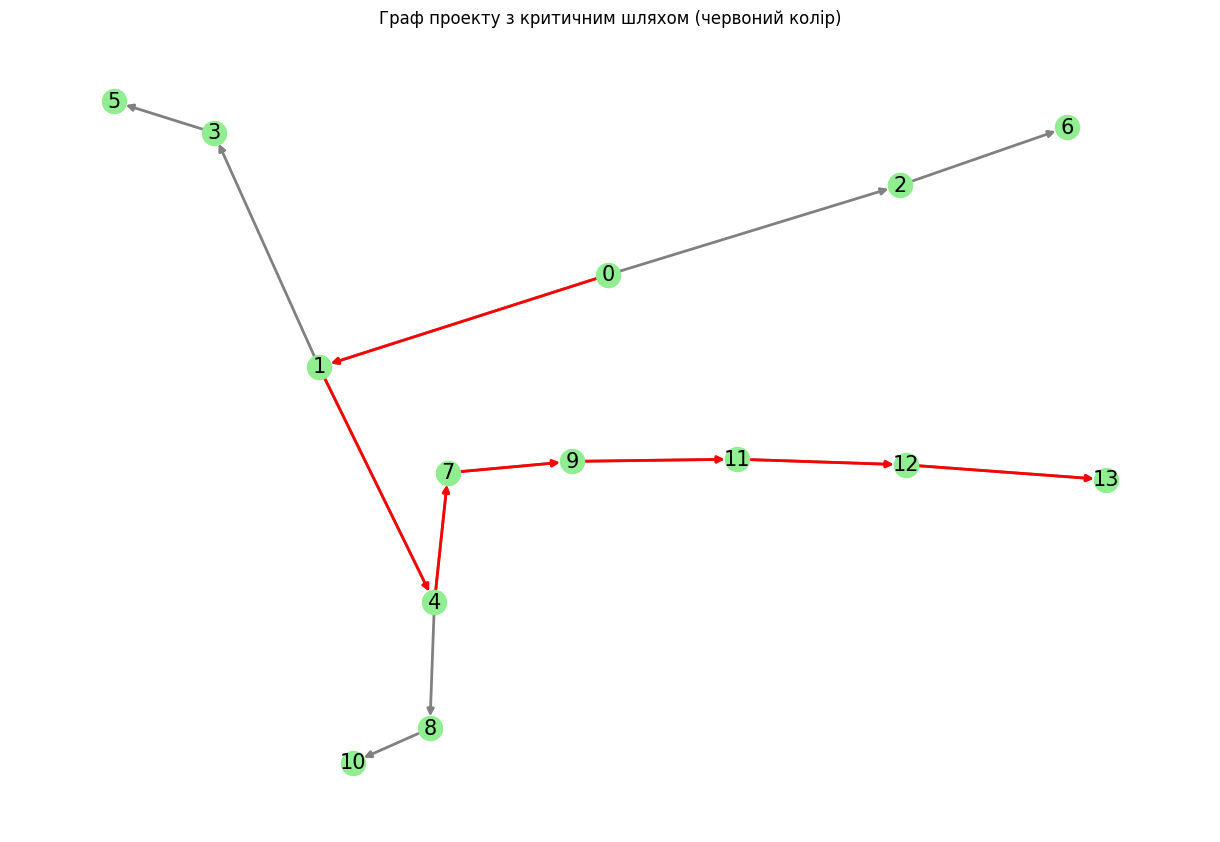

Критичний шлях: ['0', '1', '4', '7', '9', '11', '12', '13']
Тривалість проекту: 19 днів


In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 1. Створення оновленої таблиці завдань
tasks_data = {
    "Назва": ["0-2", "0-1", "1-3", "3-5", "1-4", "2-6", "4-7", "4-8", "7-9", "8-10", "9-11", "11-12", "12-13"],
    "Опис роботи": [
        "Проектування бази даних", "Підготовка дизайну", "Верстка дизайну",
        "Підготовка текстів для сайту", "Програмування динамічних елементів інтерфейсу",
        "Програмування ендпоінтів", "Поєднання фронта і беку", "Підготовка документів",
        "Користувацьке тестування сайту", "Розміщення документів на сайті",
        "Проходження валідації платіжної системи", "Підключення платіжної системи",
        "Додавання спеціальної анімації"
    ],
    "Оцінка тривалості": [4, 3, 1, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3]
}
# Створення оновленої таблиці
tasks_df = pd.DataFrame(tasks_data)
tasks_df

# 2. Створення графа з завдань
G = nx.DiGraph()
for index, row in tasks_df.iterrows():
    G.add_edge(row['Назва'].split('-')[0], row['Назва'].split('-')[1], duration=row['Оцінка тривалості'])

# 3. Розрахунок критичного шляху
def calculate_critical_path(graph):
    earliest_start = {node: 0 for node in graph}
    for node in nx.topological_sort(graph):
        for predecessor in graph.predecessors(node):
            earliest_start[node] = max(earliest_start[node], earliest_start[predecessor] + graph.edges[predecessor, node]['duration'])

    latest_finish = {node: float('inf') for node in graph}
    project_duration = max(earliest_start[node] for node in graph)
    for node in reversed(list(nx.topological_sort(graph))):
        if graph[node]:  # Якщо вузол має наступників
            latest_finish[node] = min(latest_finish[successor] - graph.edges[node, successor]['duration'] for successor in graph[node])
        else:  # Якщо вузол не має наступників
            latest_finish[node] = project_duration

    critical_path = [node for node in graph if earliest_start[node] == latest_finish[node] - graph.nodes[node].get('duration', 0)]

    return critical_path, project_duration

critical_path, project_duration = calculate_critical_path(G)

# 4.Виведення таблиці з завданнями
print("Таблиця завдань для проекту:")
print(tasks_df)

# 5. Візуалізація графа та критичного шляху
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', width=2, font_size=15)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, d in G.edges(data=True) if v in critical_path and u in critical_path], edge_color='red', width=2)
plt.title("Граф проекту з критичним шляхом (червоний колір)")
plt.show()

print("Критичний шлях:", critical_path)
print("Тривалість проекту:", project_duration, "днів")


Таблиця завдань для проекту:
  Назва                              Опис роботи  Оцінка тривалості
0   0-1                        Дослідження ринку                  2
1   1-2              Розробка концепції продукту                  3
2   2-3      Проектування інтерфейсу користувача                  4
3   3-4                       Розробка прототипу                  5
4   4-5                     Тестування прототипу                  2
5   5-6             Розробка бета-версії додатку                  6
6   6-7                   Тестування бета-версії                  3
7   7-8                    Маркетингова кампанія                  4
8   8-9                          Запуск продукту                  1
9  9-10  Моніторинг та оптимізація після запуску                  0


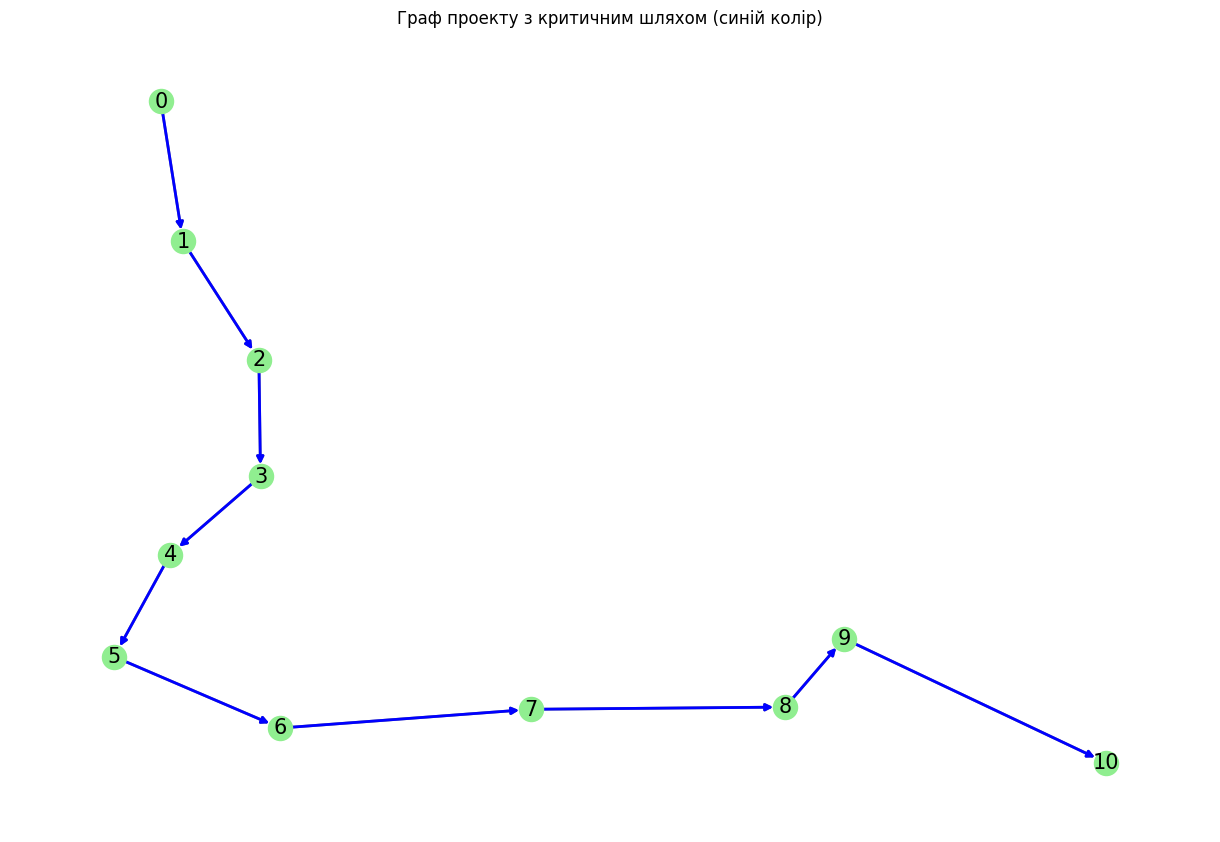

Критичний шлях: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
Тривалість проекту: 30 тижнів


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Створення таблиці з роботами та їх тривалістю для прикладу проекту
tasks_data = {
    "Назва": ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10"],
    "Опис роботи": [
        "Дослідження ринку", "Розробка концепції продукту", "Проектування інтерфейсу користувача",
        "Розробка прототипу", "Тестування прототипу", "Розробка бета-версії додатку",
        "Тестування бета-версії", "Маркетингова кампанія", "Запуск продукту",
        "Моніторинг та оптимізація після запуску"
    ],
    "Оцінка тривалості": [2, 3, 4, 5, 2, 6, 3, 4, 1, 0]  # Тривалість вказана в тижнях
}

tasks_df = pd.DataFrame(tasks_data)

# Виведення таблиці з завданнями
print("Таблиця завдань для проекту:")
print(tasks_df)

# Створення графа з даних завдань
G = nx.DiGraph()
for index, row in tasks_df.iterrows():
    G.add_edge(row['Назва'].split('-')[0], row['Назва'].split('-')[1], duration=row['Оцінка тривалості'])

# Розрахунок критичного шляху
def calculate_critical_path(graph):
    earliest_start = {node: 0 for node in graph}
    for node in nx.topological_sort(graph):
        for predecessor in graph.predecessors(node):
            earliest_start[node] = max(earliest_start[node], earliest_start[predecessor] + graph.edges[predecessor, node]['duration'])

    latest_finish = {node: float('inf') for node in graph}
    project_duration = max(earliest_start[node] for node in graph)
    for node in reversed(list(nx.topological_sort(graph))):
        if graph[node]:
            latest_finish[node] = min(latest_finish[successor] - graph.edges[node, successor]['duration'] for successor in graph[node])
        else:
            latest_finish[node] = project_duration

    critical_path = [node for node in graph if earliest_start[node] == latest_finish[node] - graph.nodes[node].get('duration', 0)]

    return critical_path, project_duration

critical_path, project_duration = calculate_critical_path(G)

# Візуалізація графа з критичним шляхом
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', width=2, font_size=15)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, d in G.edges(data=True) if v in critical_path and u in critical_path], edge_color='blue', width=2)
plt.title("Граф проекту з критичним шляхом (синій колір)")
plt.show()

print("Критичний шлях:", critical_path)
print("Тривалість проекту:", project_duration, "тижнів")

